homework 19
Veranika I
17.01.2024
v1

Проанализировать данные по выживаемости. Обучить модель предсказания выживет ли человек или нет (ключевая переменная) (различные варианты визуализации можно посмотреть здесь https://www.kaggle.com/competitions/titanic/code?competitionId=3136&sortBy=scoreDescending&language=Python).
Определить наиболее значимые переменные которые влияют на выживаемость. 
Визуализировать дерево решений. 
Написать вывод. 

In [50]:
import pandas as pd
train_data = pd.read_csv("titanic_train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId: идентификатор пассажира
Survived: выживание (0 = нет, 1 = да)
Pclass: класс билета (1 = 1st, 2 = 2nd, 3 = 3rd)
Name: имя пассажира
Sex: пол
Age: возраст
SibSp: количество братьев, сестер, супругов на борту
Parch: количество родителей, детей на борту
Ticket: номер билета
Fare: тариф
Cabin: номер каюты
Embarked: порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)

In [51]:
test_data = pd.read_csv("titanic_test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###### обработка пропусков

In [53]:
train_data['Age'] = train_data['Age'].fillna(-1)

In [33]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
most_common_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(most_common_embarked, inplace=True)
train_data = pd.get_dummies(train_data, columns=['Embarked'], prefix='Embarked')
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


###### удаление несущественных колонок

In [55]:
train_data.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,False,False,True
1,1,1,female,38.0,1,0,71.2833,True,False,False
2,1,3,female,26.0,0,0,7.9250,False,False,True
3,1,1,female,35.0,1,0,53.1000,False,False,True
4,0,3,male,35.0,0,0,8.0500,False,False,True


In [56]:
gender_map = {'female': 1, 'male': 0}
train_data['Sex'] = train_data['Sex'].map(gender_map)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True


In [57]:
train_data['Embarked_C'] = train_data['Embarked_C'].astype(int)
train_data['Embarked_Q'] = train_data['Embarked_Q'].astype(int)
train_data['Embarked_S'] = train_data['Embarked_S'].astype(int)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


###### распределение ключевых переменных

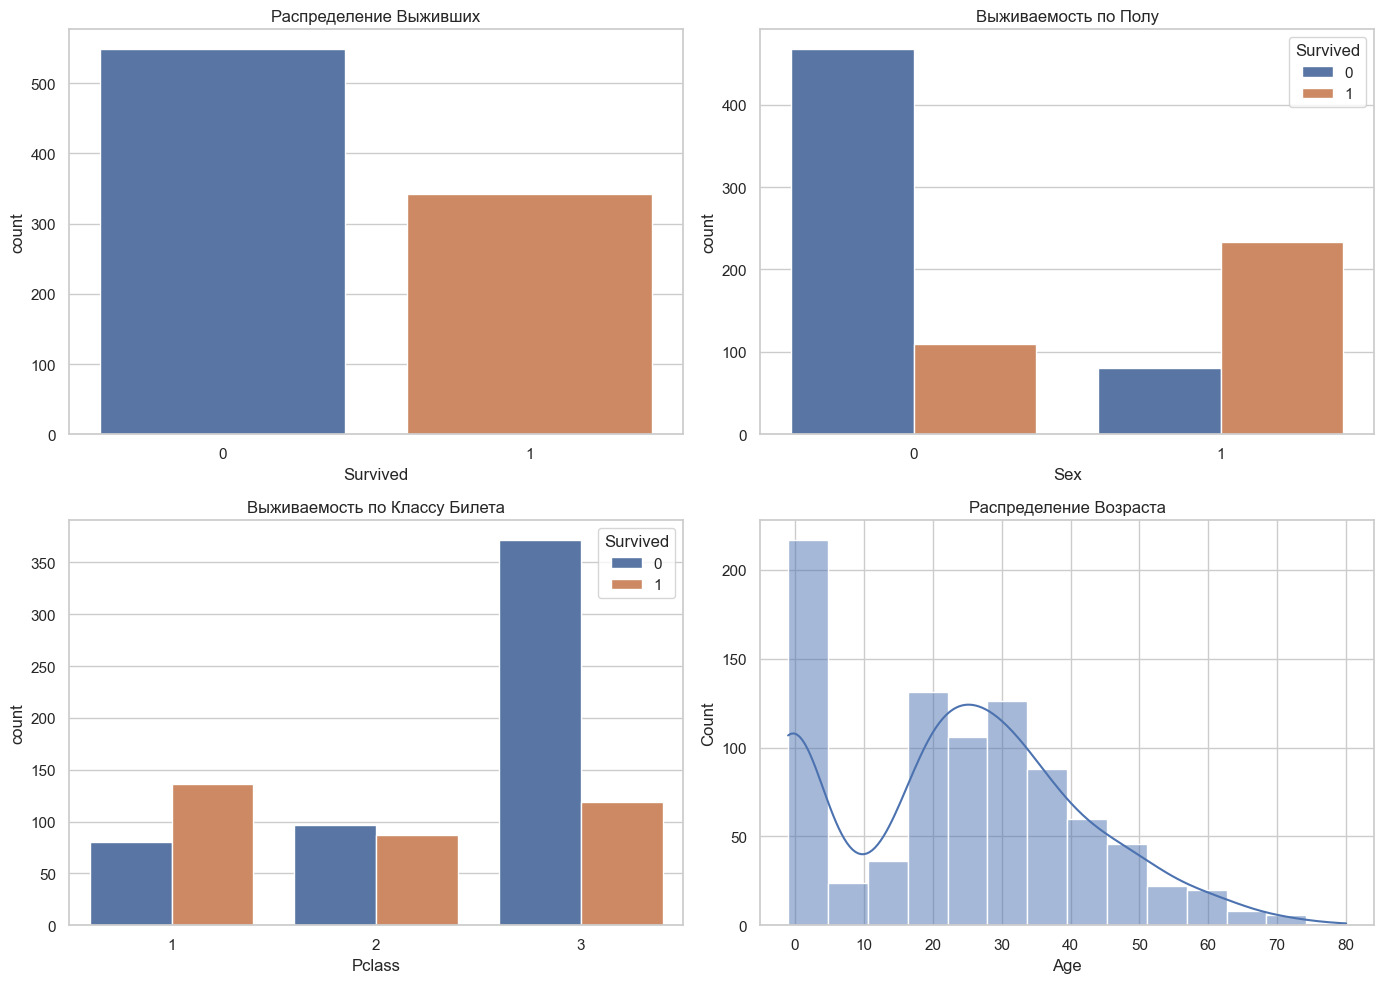

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Распределение выживших и не выживших
sns.countplot(x='Survived', data=train_data, ax=axes[0, 0])
axes[0, 0].set_title('Распределение Выживших')

# Распределение по полу
sns.countplot(x='Sex', data=train_data, hue='Survived', ax=axes[0, 1])
axes[0, 1].set_title('Выживаемость по Полу')

# Распределение по классу билета
sns.countplot(x='Pclass', data=train_data, hue='Survived', ax=axes[1, 0])
axes[1, 0].set_title('Выживаемость по Классу Билета')

# Распределение возраста
sns.histplot(train_data['Age'].dropna(), kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Распределение Возраста')

plt.tight_layout()
plt.show()

###### наблюдения:

Распределение выживших: большинство пассажиров не выжили.

Выживаемость по полу: количество выживших женщин превышает количество выживших мужчин.

Выживаемость по классу билета: пассажиры первого класса имели больше шансов на выживание, чем пассажиры второго и третьего класса.

Распределение возраста: возраст пассажиров варьируется, с преобладанием молодых людей в возрасте 20-35 лет

###### обучение модели. дерево решений

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [60]:
X = train_data.drop(['Survived'], axis=1) 
y = train_data['Survived']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [63]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [64]:
y_pred = dt_classifier.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f'Точность:\n{accuracy_score(y_test, y_pred)}')
print(f'Матрица запутанности:\n{confusion_matrix(y_test, y_pred)}')
print(f'Отчет о классификации:\n{classification_report(y_test, y_pred)}')

Точность:
0.770949720670391
Матрица запутанности:
[[84 21]
 [20 54]]
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       105
           1       0.72      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



###### уменьшение размера, визуализация дерева

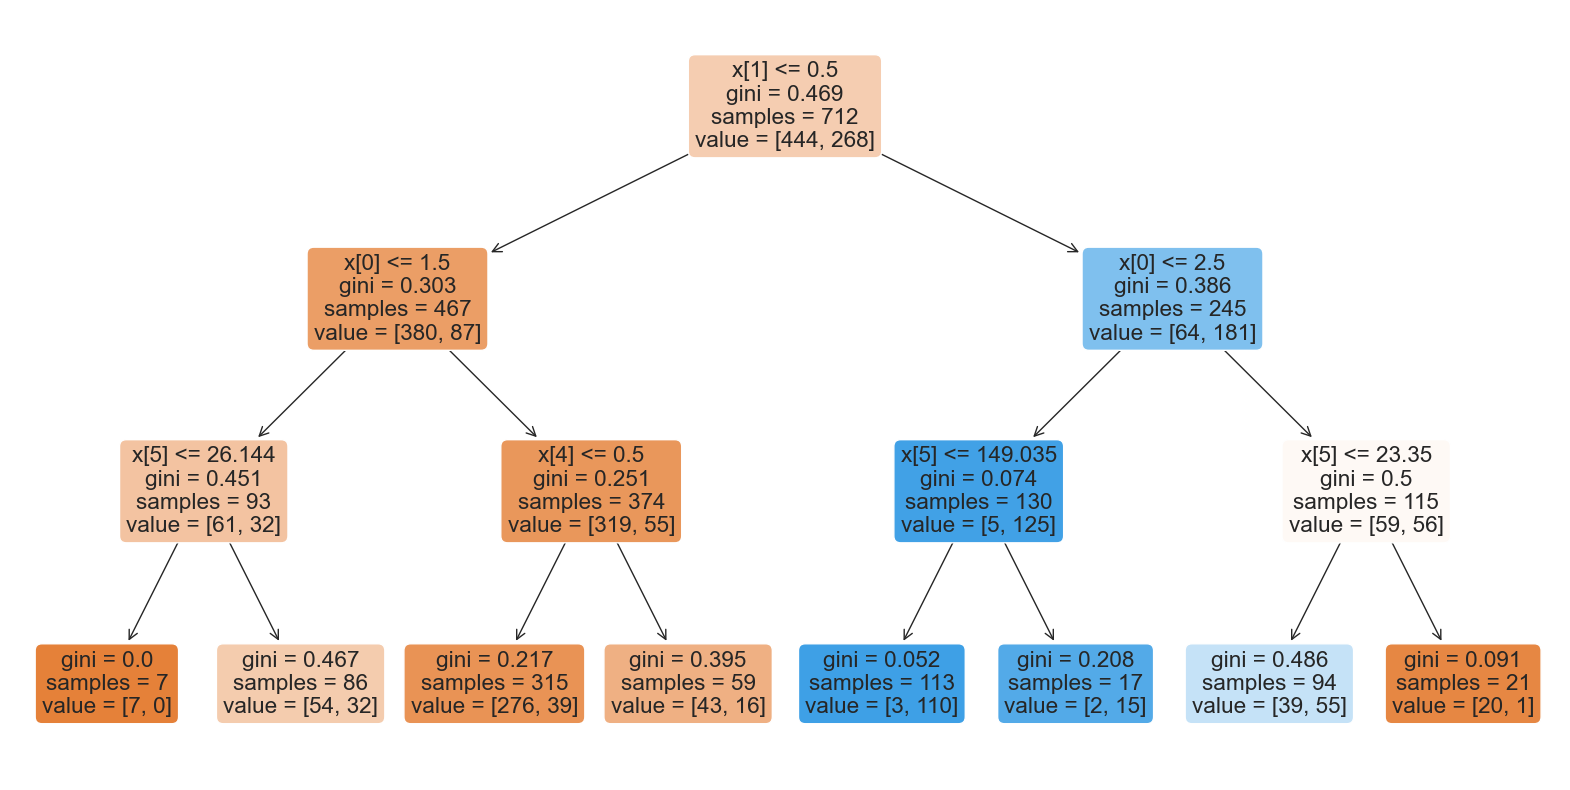

In [70]:
dt_classifier_reduced = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_classifier_reduced.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(dt_classifier_reduced, filled=True, rounded=True)
plt.show()